<a href="https://colab.research.google.com/github/Seon42/2021-2_DAP_project/blob/main/2021_2%ED%95%99%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A0%9C%EC%B6%9C%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **StartupData**


In [67]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt

# google spread sheet
import gspread as gs

# 한글폰트 깨짐 현상 관련 -- 폰트 적용
plt.rc('font', family='NanumBarunGothic')

# 폰트 크기 변경
plt.rc('font', size=14) 
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)


In [2]:
# 2019, 2020, 2021 공연 월별통계 data
gsheet_name = "MonthlyData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_monthly = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2020, 2021 중계 data
gsheet_name = "StrimmingData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_strimming = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2020, 2021 공연 취소/재예매 data
gsheet_name = "TicketData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_ticket = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2020, 2021 공연 취소/재예매 data
gsheet_name = "CancelData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_cancel = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 동일 극장의 사회적 거리 두기 단계별 data
gsheet_name = "StepData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_step = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)


# **개요**


> **주제 : 코로나19로 인한 공연예술분야(연극, 뮤지컬) 피해와 변화 분석**

> **주제선정 이유**
+ 좋아하는 장르와 관련된 주제를 정해 데이터를 분석해보자는 생각이 들었다. 
+ 피해가 특히 심했던 작년 3월, 8월, 12월 외에도 피해량이 어떤지 궁금했기에 해당 주제를 선정했다. 

> **NOTICE**
+ 장르는 '연극'과 '뮤지컬'로 한정한다.
+ 현장 공연의 경우 '서울'에 있는 극장에서 진행한 공연으로 한정한다.
+ 2019~2021 자료 기반
+ 참고자료는 마지막 문항에 별도로 기입한다.

**사회적 거리두기 시행일시 정리**
'수도권' 기준
> 2020년
+ 3월 : 거리두기 발표(집단감염 위험시설 운영 제한)
+ 5월 : 생활 속 거리두기
+ 8월 : 2단계 격상
+ 08.31~09.13 : 2.5단계 강화
+ 09.14~09.27 : 2단계 하향
+ 10월 : 1단계 하향
+ 11.07 : 거리두기 5단계로 세분화
+ 11.24~12.07 : 2단계 강화
+ 12.08~01.03 : 2.5단계 강화

> 2021년
+ 01.03~02.14 : 2.5단계
+ 02.15~06.18 : 2단계
+ 07.01 : 거리두기 5단계->4단계 간소화
+ 07.12~10.17 : 4단계 강화
+ 10.18 : 거리두기 조정(사적모임 기준 완화, 접종완료자 제한 완화)
+ 11.01~11.28 : 단계적 일상회복 전환
+ 11.29~12.17 : 일상회복 개편, 특별방역대책 실시
+ 12.18~01.02 : 거리두기 강화('단계적 일상회복' 회복을 위한 거리두기)

# **1. 연극, 뮤지컬 공연 실적(상연 횟수, 매출액) 비교**

**NOTICE**
* 분석 자료는 **'2019년 07월'부터 '2021년 12월'까지**를 기준으로 한다.
> 2019 상반기 데이터가 다수 누락됐기 때문에 제외한다.
>> 자료의 출처인 KOPIS(공연예술통합전산망) 데이터 전송 의무화 시점 : 2019년 06월 이후
* 2021 12월 data는 '12월 20일'을 기준으로 한다. 

> **관련 용어 설명**
+ 상연횟수(회) : 당월 내에 공연 된 상연횟수를 의미한다.
+ 매출액(천원) : 당월 내에 공연의 전산 발권된 티켓으로 인한 매출 금액을 의미한다.

In [3]:
# 2019.07 ~ 2021.12 월별통계 DF
df_statics = pd.read_csv(gsheet_url_monthly)
df_statics

,Date,상연횟수,매출액
0,2019-07,8718,16432380
1,2019-08,10527,26900492
2,2019-09,7570,23309533
3,2019-10,9186,29950618
4,2019-11,9133,34615357
5,2019-12,11666,54699925
6,2020-01,7628,39021745
7,2020-02,5116,21217712
8,2020-03,2167,9140850
9,2020-04,2185,4693950


In [4]:
df_numOfStaging = df_statics.loc[:, ['Date', '상연횟수']]
df_sales = df_statics.loc[:, ['Date', '매출액']]

df_AllStag = df_numOfStaging.set_index('Date')
df_AllSale = df_sales.set_index('Date')

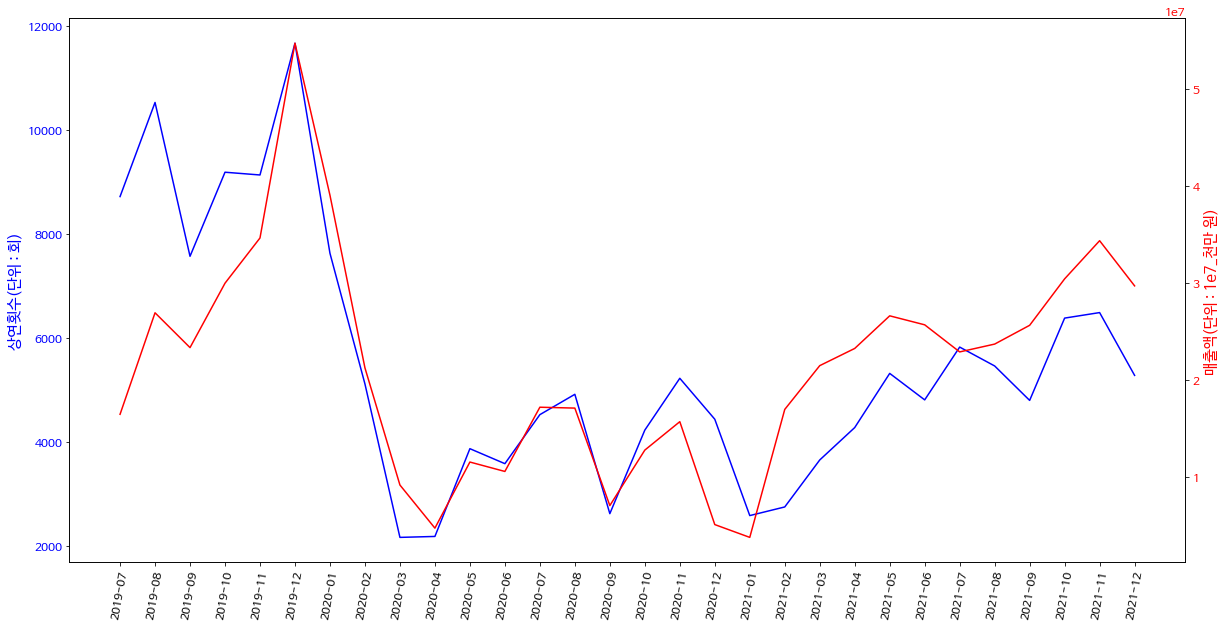

In [5]:
fig = plt.figure(figsize=(20,10))

### 2019.07~2021.12 기간의 '상연횟수', '매출액'에 대한 twin plot

fig.set_facecolor('white')
ax1 = fig.add_subplot()

color1 = 'blue'
ax1.plot(df_AllStag, color=color1)
ax1.set_ylabel('상연횟수(단위 : 회)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=80)

color2 = 'red'
ax2 = ax1.twinx()
ax2.plot(df_AllSale, color=color2)
ax2.set_ylabel('매출액(단위 : 1e7_천만 원)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

>  **결과**
* 상연횟수와 매출액은**대체적으로 비슷**한 양상을 보이며 그려진다.
* 코로나바이러스가 국내에서 처음 발견된 시점(**2020년 01월**)부터 **하락세**를 보이는 것을 알 수 있다.
+ 2021년부터는 백신접종과 가변석 시행으로 인해 점차 매출액이 증가하는 것을 알 수 있다.
+ 2019년에 비해 확연히 줄어든 '상연횟수'는 점차 상승세를 보이고 있다.
* **2021년 1월부터 12월까지 2020년과 다르게 매출액이 상연횟수보다 위에 그려지는 이유**
 1. 코로나로 인한 피해가 지속되면서 기존의 티켓값에 대한 할인권종들의 **할인율이 감소해 티켓값이 인상**되었다.
 2. 공연업계에 대한 거리두기 기준 완화에 의해 **판매가능한 좌석수**가 변화했다.

+ 뒷부분에서 취소/재예매 부분과 함께 추가 비교 진행

# **2. 공연 중계(녹화, 실시간)**

**NOTICE**
  
+ 2020, 2021 기간 내의 중계를 기준으로 한다.
> 코로나 이전의 경우 대부분의 제작사에서 DVD 판매만을 진행하고 중계는 하지 않았기에 포함하지 않는다.
+ 쇼케이스, 콘서트 등의 분야는 제외한다.
+ 연극, 뮤지컬 장르의 시츠프로브 등도 제외한다.
+ 녹화중계, 실시간 중계 등 해당 장르의 **'전막 중계' 회차를 모두 포함**한다.

In [6]:
# 2020, 2021 중계 DF
df_strimming = pd.read_csv(gsheet_url_strimming)
df_strimming

,Date,Day,Genre,Title,Price,Platform
0,2020-01-29,수,뮤지컬,앤서니 브라운 뮤지컬 비바 프렌드,무료,네이버
1,2020-02-02,일,뮤지컬,줄리 앤 폴,무료,네이버
2,2020-02-09,일,뮤지컬,여명의 눈동자,무료,네이버
3,2020-02-09,수,뮤지컬,사랑은 비를 타고,무료,네이버
4,2020-02-25,화,연극,마트료시카,무료,네이버
...,...,...,...,...,...,...
397,2021-12-29,수,뮤지컬,잭 더 리퍼,유료,메타씨어터
398,2021-12-30,목,뮤지컬,잭 더 리퍼,유료,메타씨어터
399,2021-12-30,목,뮤지컬,1976 할란카운티,유료,네이버
400,2021-12-31,금,뮤지컬,잭 더 리퍼,유료,메타씨어터


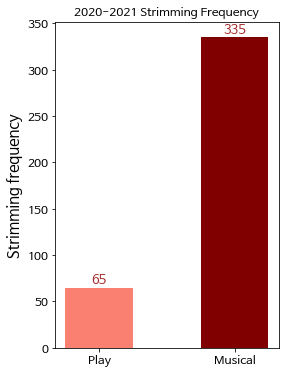

In [7]:
# 2020, 2021 전체 중계 중 장르로만 구분한 그래프

play = ['연극']
musical = ['뮤지컬']

play_data = df_strimming[df_strimming['Genre'].isin(play)]
musical_data = df_strimming[df_strimming['Genre'].isin(musical)]

count_genre = [play_data.shape[0], musical_data.shape[0]]
colors = ['salmon', 'maroon']
genre = ['Play', 'Musical']

plt.figure(figsize=(4,6))

plt.bar(genre, count_genre, color=colors, width=0.5)
plt.xticks()
plt.ylabel("Strimming frequency")
plt.title("2020-2021 Strimming Frequency")

# 각 장르별 중계 횟수 표시
for i, v in enumerate(genre):
    plt.text(v, count_genre[i], str(count_genre[i]),          
             fontsize = 13, 
             color='brown',
             horizontalalignment='center',  
             verticalalignment='bottom') 

plt.show()

**결과**
>  
+ 2020년부터 2021년까지 연극은 총 65번, 뮤지컬은 총 335번 중계되었다.

In [8]:
### 연도별 월 구분

dateIndex_strimming = df_strimming.set_index('Date')

# 2020년
Jan_20 = dateIndex_strimming['2020-01':'2020-02']
Feb_20 = dateIndex_strimming['2020-02':'2020-03']
Mar_20 = dateIndex_strimming['2020-03':'2020-04']
Apr_20 = dateIndex_strimming['2020-04':'2020-05']
May_20 = dateIndex_strimming['2020-05':'2020-06']
Jun_20 = dateIndex_strimming['2020-06':'2020-07']
Jul_20 = dateIndex_strimming['2020-07':'2020-08']
Aug_20 = dateIndex_strimming['2020-08':'2020-09']
Sep_20 = dateIndex_strimming['2020-09':'2020-10']
Oct_20 = dateIndex_strimming['2020-10':'2020-11']
Nov_20 = dateIndex_strimming['2020-11':'2020-12']
Dec_20 = dateIndex_strimming['2020-12':'2021-01']

#2021년
Jan_21 = dateIndex_strimming['2021-01':'2021-02']
Feb_21 = dateIndex_strimming['2021-02':'2021-03']
Mar_21 = dateIndex_strimming['2021-03':'2021-04']
Apr_21 = dateIndex_strimming['2021-04':'2021-05']
May_21 = dateIndex_strimming['2021-05':'2021-06']
Jun_21 = dateIndex_strimming['2021-06':'2021-07']
Jul_21 = dateIndex_strimming['2021-07':'2021-08']
Aug_21 = dateIndex_strimming['2021-08':'2021-09']
Sep_21 = dateIndex_strimming['2021-09':'2021-10']
Oct_21 = dateIndex_strimming['2021-10':'2021-11']
Nov_21 = dateIndex_strimming['2021-11':'2021-12']
Dec_21 = dateIndex_strimming['2021-12':]

## 각 기간에 존재하는 행의 개수를 세 월별 중계 횟수를 저장한다.
# 2020 중계
count_monthData20 = [Jan_20.shape[0],Feb_20.shape[0],Mar_20.shape[0]
                         ,Apr_20.shape[0],May_20.shape[0],Jun_20.shape[0]
                         ,Jul_20.shape[0],Aug_20.shape[0],Sep_20.shape[0]
                         ,Oct_20.shape[0],Nov_20.shape[0],Dec_20.shape[0]]

# 2021 중계
count_monthData21 = [Jan_21.shape[0],Feb_21.shape[0],Mar_21.shape[0]
                         ,Apr_21.shape[0],May_21.shape[0],Jun_21.shape[0]
                         ,Jul_21.shape[0],Aug_21.shape[0],Sep_21.shape[0]
                         ,Oct_21.shape[0],Nov_21.shape[0],Dec_21.shape[0]]

# plot의 x축으로 들어갈 이름
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

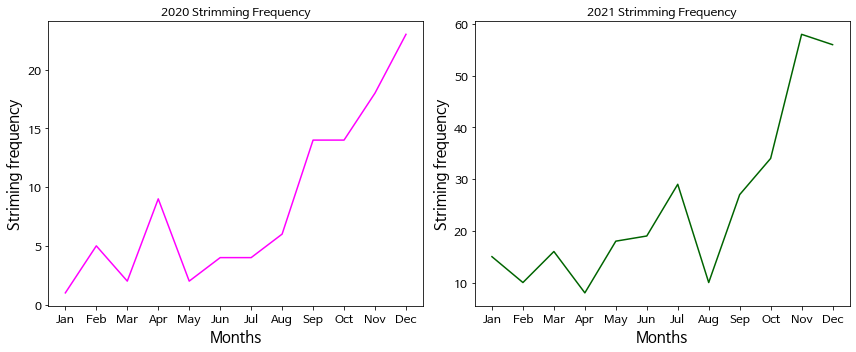

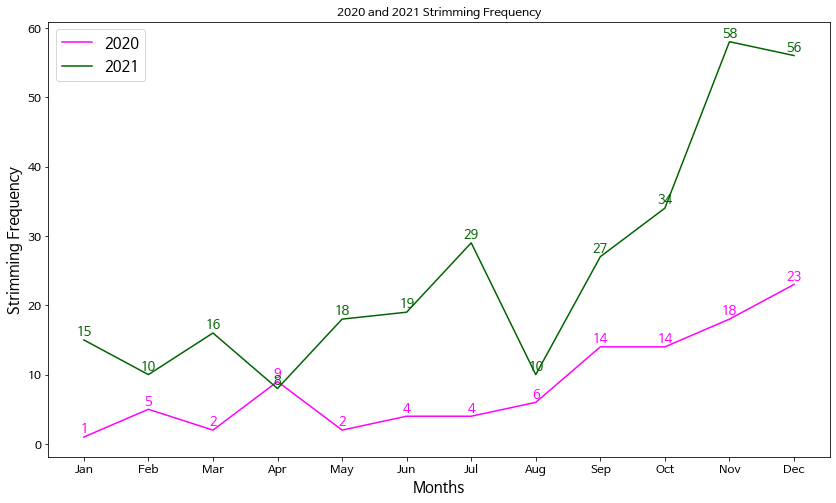

In [9]:
### 2020, 2021 월별 중계 데이터 출력

plt.figure(figsize=(12,5))

# 2020 월별 중계 빈도 그래프
plt.subplot(1, 2, 1)
plt.plot(months, count_monthData20, color='magenta')
plt.xlabel("Months")
plt.ylabel("Striming frequency")
plt.title("2020 Strimming Frequency")

# 2021 월별 중계 빈도 그래프
plt.subplot(1, 2, 2)
plt.plot(months, count_monthData21, color='darkgreen')
plt.xlabel("Months")
plt.ylabel("Striming frequency")
plt.title("2021 Strimming Frequency")

plt.tight_layout()

# 2020, 2021 월별 중계 빈도 그래프 합본
plt.figure(figsize=(14,8))
plt.plot(months, count_monthData20, color='magenta', label='2020')
plt.plot(months, count_monthData21, color='darkgreen', label='2021')
plt.xlabel("Months")
plt.ylabel("Strimming Frequency")
plt.title("2020 and 2021 Strimming Frequency")
plt.legend(loc='best', ncol=1, fontsize=15)

## 각 그래프에 중계 횟수 표시
# 2020
for i, v in enumerate(months):
     # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
    plt.text(v, count_monthData20[i], count_monthData20[i],          
             fontsize = 13, 
             color='magenta',
             horizontalalignment='center',
             verticalalignment='bottom')    
# 2021
for i, v in enumerate(months):
    plt.text(v, count_monthData21[i], count_monthData21[i],          
             fontsize = 13, 
             color='darkgreen',
             horizontalalignment='center',  
             verticalalignment='bottom')   


**중계 그래프 결과**
>  
1. **2020년**의 온라인 중계 횟수는 **점차 증가**하는 것을 알 수 있다.
2. 2020년에 비해 **2021년**은 온라인 중계가 **대폭 증가**하는 추세를 보인다.
3. 바이러스로 인해 극장에 직접 가는 일이 어려워졌기 때문에 대부분의 제작사에서 자발적으로, 또는 국가로부터 지원을 받는 등의 방식을 통해 공연을 영상물로 남기고, 이를 송출하는 빈도가 늘었다.


# **3. COVID-19로 인한 공연 취소/재예매**

**NOTICE**
*   조사 기간 : 2020.01.01 ~ 2021.12.19
*   제작사에서 공식적으로 코로나 관련 취소/재예매라고 명시한 극들만 사용하였다.
> 제작사가 코로나를 이유로 취소하였으나, 이후 내부사정 등으로 인해 취소되었다고 밝혀진 공연들은 제외한다.
*   예매 전 취소된 경우는 제외한다.
*   대학로에서 '오픈런' 형식으로 진행되는 공연의 경우, 확인된 일부만 포함한다.
*   연극, 뮤지컬 구분X
*   거리두기석만 존재했던 2020년과 달리, 2021년은 거리두기석과 가변석이 존재한다.

 2020 : 거리두기 단계에 따라 무조건 재예매

 2021 : 재예매 또는 가변석만 취소
* '가변석'이 취소되는 경우는 포함하지 않았다.

> **관련 용어 설명**
+ 취소 횟수 : 공연 자체가 취소되거나, 조기폐막하거나, 공연 중간에 거리두기 강화 등으로 인해 예매된 티켓이 취소된 횟수
>> '재예매'로 들어갈 경우 '취소 횟수'에 포함하지 않는다.
+ 재예매 횟수 : 거리두기 때문에 예매된 티켓이 취소된 후 진행된 재예매 횟수
>> 회차와 상관없이 재예매가 진행된 횟수만 count하고, 선예매와 일반예매로 나뉘어 진행되어도 한 번으로 count한다.
+ 공연 취소 : 공연 자체의 취소를 뜻하며  취소되는 회차는 포함하지 않는다.
+ 재오픈(재예매) : 사회적 거리두기로 인해 티켓의 일괄취소 후 시행된 예매를 말한다.
+ 중복O : 취소 횟수, 재예매 횟수, 공연 취소, 재오픈
+ 중복X : 취소 극 개수, 재예매 극 개수





In [9]:
# 2020, 2021 취소, 재예매 관련 DF
df_ticket = pd.read_csv(gsheet_url_ticket)
df_ticket

,Date,취소 횟수,재예매 횟수,취소 극 개수,재예매 극 개수
0,2020,64,46,47,28
1,2021,9,23,7,14


In [10]:
## 취소데이터와 재예매데이터 분리 및 DF 생성
num = ['취소 횟수', '취소 극 개수', '재예매 횟수', '재예매 극 개수']
numOfCancel = ['취소 횟수', '취소 극 개수']
numOfRe = ['재예매 횟수', '재예매 극 개수']
year = ['2020', '2021']

cancelDf = df_ticket[numOfCancel]
reDf = df_ticket[numOfRe]

cancel20 = cancelDf.loc[0]
cancel21 = cancelDf.loc[1]
re20 = reDf.loc[0]
re21 = reDf.loc[1]

cancel_df = df.transpose(pd.DataFrame({'2020': cancel20, '2021': cancel21}))
re_df = df.transpose(pd.DataFrame({'2020': re20, '2021': re21}))

In [11]:
## 상연횟수/매출액 월 범위 지정
df_numOfStaging = df_statics.loc[6:, ['Date', '상연횟수']]
df_sales = df_statics.loc[6:, ['Date', '매출액']]

df_AllStag = df_numOfStaging.set_index('Date')
df_AllSale = df_sales.set_index('Date')

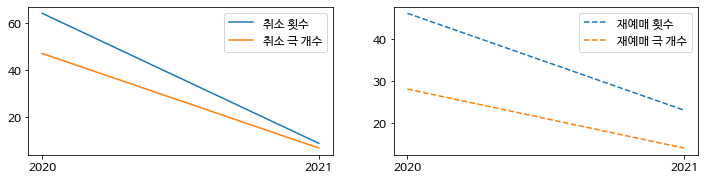

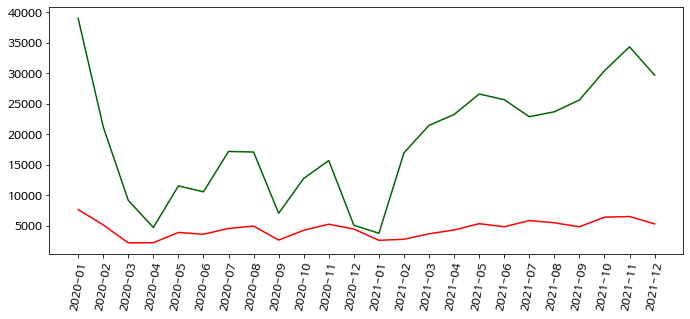

In [12]:
## 연도별 취소/재예매 분야의 비교
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.plot(year, cancel_df)
plt.legend(numOfCancel)

plt.subplot(2,2,2)
plt.plot(year, re_df, linestyle="--")
plt.legend(numOfRe)

### 2020.01~2021.12 기간의 '상연횟수', '매출액'에 대한 그래프
plt.figure(figsize=(25,10))
plt.subplot(2,2,3)
plt.plot(df_AllStag, color='red') #상연횟수
plt.plot(df_AllSale/1000, color='darkgreen') #매출액
plt.xticks(rotation=80)

plt.show()


>  **'2020-2021 취소, 재예매 비교'에 대한 결과**
* 2020년에 비해 **2021년**은 취소 또는 재예매 되는 횟수가 전체적으로 **줄어들었다**는 것을 알 수 있다. 
* 그에 따라 **상연횟수가 점차 증가**하고 있음을 알 수 있다.



**취소/재예매, 상연횟수/매출액의 상관관계를 이용해 비교한 결과**
+ '상연횟수(red)'의 단위 : 회
+ '매출액(darkgreen)'의 단위 : 천만 원

>  
1. 위 그래프에서 '상연횟수'와 '매출액'을 비교했을 때, '상연횟수'에 따라 '매출액'이 함께 변화함을 알 수 있다.
2. 2020년에 비해 2021년의 취소/재예매 횟수가 줄어듦에 따라 상연횟수 또한 증가함을 알 수 있다.
3. **그래프의 꺾임에 대한 추가 설명**
 + 2020년 1월~4월 : 국내 확진자 수의 증가와 거리두기 발표 등으로 인한 자발적 티켓취소, 공연의 조기폐막, 개막연기가 진행되었다. '공연취소'가 주를 이뤘기 때문에 상연횟수와 매출액이 급감했다.
 + 2020년 8월~9월 : 8월 말, 배우 간 밀접/간접 접촉과 단계 상향으로 인해 다수의 공연이 취소되었다.
 + 2020년 10월 : 거리두기 단계의 하향에 따른 예매량 증가
 + 2020년 11월~2021년 01월 : 거리두기 단계 개편 및 강화로 인한 거리두기 좌석의 증가
 + 2021년 1월~2월 : 거리두기 상향
 + 2021년 2월~6월 : 거리두기 하향
 + 2021년 7월~10월 : 거리두기 상향
 + 2021년 11월 : 단계적일상회복 시행
 + 2021년 12월 : 12월 20일까지의 데이터만 포함.


In [27]:
# 2020, 2021 취소, 재예매, 조기폐막 관련 DF
df_cancel = pd.read_csv(gsheet_url_cancel)
df_cancel

,Date,Genre,Title,State
0,2020-02-24,뮤지컬,"마마,돈크라이",공연취소
1,2020-02-24,뮤지컬,은밀하게 위대하게,조기폐막
2,2020-02-26,뮤지컬,로빈,공연취소
3,2020-02-28,연극,쉬어매드니스,공연취소
4,2020-02-28,연극,위대한 개츠비,조기폐막
...,...,...,...,...
136,2021-09-22,뮤지컬,빌리 엘리어트,공연취소
137,2021-09-23,뮤지컬,빌리 엘리어트,공연취소
138,2021-11-19,뮤지컬,엔딩 노트,공연취소
139,2021-11-20,뮤지컬,지킬앤하이드,공연취소


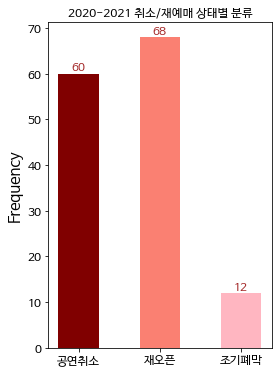

In [14]:
## State를 기준으로 분류

cancel_data = df_cancel[df_cancel['State'].isin(['공연취소'])]
reOpen_data = df_cancel[df_cancel['State'].isin(['재오픈'])]
close_data = df_cancel[df_cancel['State'].isin(['조기폐막'])]

count_state = [cancel_data.shape[0], reOpen_data.shape[0], close_data.shape[0]]
colors = ['maroon','salmon','lightpink']
state = ['공연취소', '재오픈', '조기폐막']

plt.figure(figsize=(4,6))

plt.bar(state, count_state, color=colors, width=0.5)
plt.xticks()
plt.ylabel("Frequency")
plt.title("2020-2021 취소/재예매 상태별 분류")

for i, v in enumerate(state):
    plt.text(v, count_state[i], count_state[i],          
             fontsize = 12, 
             color='brown',
             horizontalalignment='center',  
             verticalalignment='bottom') 

plt.show()


>  **'2020-2021 취소, 재예매, 조기폐막'에 대한 결과**
* 총 60번의 공연취소, 68번의 재오픈(재예매), 12번의 조기폐막이 있었다.

In [15]:
## 각 기간에 존재하는 행의 개수를 세 월별 state(공연취소) 횟수를 저장한다.
dateIndex_strimming = cancel_data.set_index('Date')

# 2020년
Jan_20 = dateIndex_strimming['2020-01':'2020-02']
Feb_20 = dateIndex_strimming['2020-02':'2020-03']
Mar_20 = dateIndex_strimming['2020-03':'2020-04']
Apr_20 = dateIndex_strimming['2020-04':'2020-05']
May_20 = dateIndex_strimming['2020-05':'2020-06']
Jun_20 = dateIndex_strimming['2020-06':'2020-07']
Jul_20 = dateIndex_strimming['2020-07':'2020-08']
Aug_20 = dateIndex_strimming['2020-08':'2020-09']
Sep_20 = dateIndex_strimming['2020-09':'2020-10']
Oct_20 = dateIndex_strimming['2020-10':'2020-11']
Nov_20 = dateIndex_strimming['2020-11':'2020-12']
Dec_20 = dateIndex_strimming['2020-12':'2021-01']

#2021년
Jan_21 = dateIndex_strimming['2021-01':'2021-02']
Feb_21 = dateIndex_strimming['2021-02':'2021-03']
Mar_21 = dateIndex_strimming['2021-03':'2021-04']
Apr_21 = dateIndex_strimming['2021-04':'2021-05']
May_21 = dateIndex_strimming['2021-05':'2021-06']
Jun_21 = dateIndex_strimming['2021-06':'2021-07']
Jul_21 = dateIndex_strimming['2021-07':'2021-08']
Aug_21 = dateIndex_strimming['2021-08':'2021-09']
Sep_21 = dateIndex_strimming['2021-09':'2021-10']
Oct_21 = dateIndex_strimming['2021-10':'2021-11']
Nov_21 = dateIndex_strimming['2021-11':'2021-12']
Dec_21 = dateIndex_strimming['2021-12':]

# 2020
count_cancel20 = [Jan_20.shape[0],Feb_20.shape[0],Mar_20.shape[0]
                         ,Apr_20.shape[0],May_20.shape[0],Jun_20.shape[0]
                         ,Jul_20.shape[0],Aug_20.shape[0],Sep_20.shape[0]
                         ,Oct_20.shape[0],Nov_20.shape[0],Dec_20.shape[0]]

# 2021
count_cancel21 = [Jan_21.shape[0],Feb_21.shape[0],Mar_21.shape[0]
                         ,Apr_21.shape[0],May_21.shape[0],Jun_21.shape[0]
                         ,Jul_21.shape[0],Aug_21.shape[0],Sep_21.shape[0]
                         ,Oct_21.shape[0],Nov_21.shape[0],Dec_21.shape[0]]

# plot의 x축으로 들어갈 이름
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

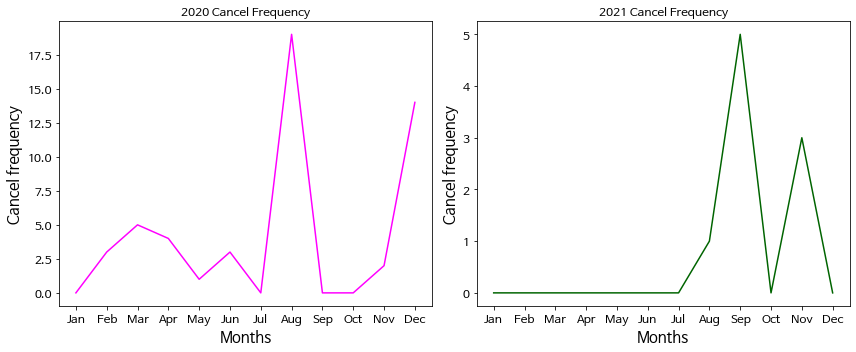

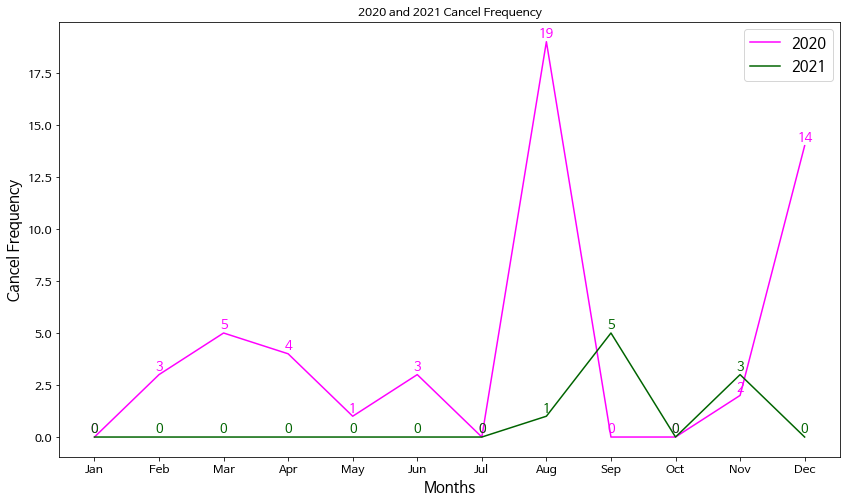

In [26]:
### 2020, 2021 월별 공연취소 데이터 출력

plt.figure(figsize=(12,5))

# 2020 월별 취소 빈도 그래프
plt.subplot(1, 2, 1)
plt.plot(months, count_cancel20, color='magenta')
plt.xlabel("Months")
plt.ylabel("Cancel frequency")
plt.title("2020 Cancel Frequency")

# 2021 월별 취소 빈도 그래프
plt.subplot(1, 2, 2)
plt.plot(months, count_cancel21, color='darkgreen')
plt.xlabel("Months")
plt.ylabel("Cancel frequency")
plt.title("2021 Cancel Frequency")

plt.tight_layout()

# 2020, 2021 월별 취소 빈도 그래프 합본
plt.figure(figsize=(14,8))
plt.plot(months, count_cancel20, color='magenta', label='2020')
plt.plot(months, count_cancel21, color='darkgreen', label='2021')
plt.xlabel("Months")
plt.ylabel("Cancel Frequency")
plt.title("2020 and 2021 Cancel Frequency")
plt.legend(loc='best', ncol=1, fontsize=15)

## 각 그래프에 취소 횟수 표시
# 2020
for i, v in enumerate(months):
    plt.text(v, count_cancel20[i], count_cancel20[i],          
             fontsize = 13, 
             color='magenta',
             horizontalalignment='center',
             verticalalignment='bottom')    
# 2021
for i, v in enumerate(months):
    plt.text(v, count_cancel21[i], count_cancel21[i],          
             fontsize = 13, 
             color='darkgreen',
             horizontalalignment='center',  
             verticalalignment='bottom')   


# **4. 동일 극장(소/중/대극장)의 사회적 거리 두기 단계별 좌석 수, 예상 수익**

**NOTICE**
*   일반 가격(정가), 전석매진을 기준으로 한다.

>  
+ Orig : 코로나 이전일 때 전석 매진 시의 수익
+ lev4 : 거리두기 4단계일 때 전석 매진 시의 수익
+ with : 단계적 일상회복일 때 전석 매진 시의 수익
+ Profit : 'Orig'을 기준으로 각 단계에서의 수익
+ Loss : 'Orig'을 기준으로 각 단계에서의 수익

*   서울에 위치한 소극장, 중극장, 대극장에서 각각 하나씩 선택해 비교를 진행했다.

> 소/중/대극장 구분 기준 : 300석 미만 / 500석 안팎 / 1000석 이상
+ 소극장(자유극장 | 233석 | R석)
+ 중극장(유니플렉스1관 | 600석 | R-S-A석)
+ 대극장(샤롯데씨어터 | 1240석 | VIP-R-S-A석)


*   휠체어석, 판매보류석, 사석은 제외한다.
*   가변석 = 가변석 + 추가오픈석 + 거리두기추가오픈석
*   코로나 이전(전석) vs 4단계(거리두기석+가변석) vs 일상회복(거리두기석)

*   단계적 일상회복 항목에서 '거리두기석'만 사용하는 이유
> '유니플렉스1관'의 경우, 거리두기 단계에 따라 기존의 거리두기석이 별도의 좌석 재배치 없이 가변석으로 바뀌어 좌석수 변화가 없다(즉, 거리두기석과 가변석을 합친 값이 항상 동일하다). 가변석 전체 취소를 가정하게 된다면 4단계와 일상회복 단계의 티켓값이 동일해져 비교가 불가능하기 때문.

*   단계적 일상회복의 좌석이 18시 이전/이후로 나눠진 경우, 18시 이전의 좌석을 기준으로 한다.




In [17]:
# 거리두기 단계별 수익과 좌석수 데이터 가져오기
df_stepData = pd.read_csv(gsheet_url_step)
df_stepData

,🎫,자유극장,유니플렉스1관,샤롯데씨어터
0,기존 이익(원),"15,378,000","41,250,000","141,960,000"
1,4단계 이익(원),"10,758,000","27,478,000","97,090,000"
2,일상회복단계 이익(원),"14,586,000","39,204,000","123,480,000"
3,기존 좌석(석),233,577,"1,134"
4,4단계 좌석(석),70,192,358
5,일상회복단계 좌석(석),12,28,79


In [18]:
# 콤마(,)를 제거하고 string을 numeric으로 변환

## 소극장(자유극장)
sTheater = pd.to_numeric(df_stepData['자유극장'].str.replace(',', ''))

## 중극장(유니플렉스1관)
mTheater = pd.to_numeric(df_stepData['유니플렉스1관'].str.replace(',', ''))

## 대극장(샤롯데씨어터)
gTheater = pd.to_numeric(df_stepData['샤롯데씨어터'].str.replace(',', ''))

#-------------------------------------------------------------------------------

# 거리두기 단계 구분 변수 생성
step = ['기존', '거리두기4단계', '단계적일상회복']

# 좌석 이용 가능/불가능 구분 변수
# 거리두기 좌석의 경우 UnAvailable, 아닌 좌석은 Available
available = ['Available', 'UnAvailable']

# 극장 이름 구분 변수
theaterN = ['소극장(자유극장)', '중극장(유니플렉스1관)', '대극장(샤롯데씨어터)']


In [19]:
### 거리두기 단계별 각 극장의 좌석수 변화 data

## 소극장(자유극장)
sSeat_orig = sTheater.loc[3]
sSeat_lev4 = sTheater.loc[4]
sSeat_with = sTheater.loc[5]

sSeat_available = [sSeat_orig,
                    sSeat_orig-sSeat_lev4, 
                    sSeat_orig-sSeat_with]
sSeat_unavailable = [0, sSeat_lev4, sSeat_with]

sSeat_df = pd.DataFrame({'Available': sSeat_available,
                            'UnAvailable': sSeat_unavailable}, index=step)

#--------------------------------------------------------------------------------

## 중극장(유니플렉스1관)
mSeat_orig = mTheater.loc[3]
mSeat_lev4 = mTheater.loc[4]
mSeat_with = mTheater.loc[5]

mSeat_available = [mSeat_orig,
                    mSeat_orig-mSeat_lev4, 
                    mSeat_orig-mSeat_with]
mSeat_unavailable = [0, mSeat_lev4, mSeat_with]

mSeat_df = pd.DataFrame({'Available': mSeat_available,
                            'UnAvailable': mSeat_unavailable}, index=step)

#--------------------------------------------------------------------------------

## 대극장(샤롯데씨어터)
gSeat_orig = gTheater.loc[3]
gSeat_lev4 = gTheater.loc[4]
gSeat_with = gTheater.loc[5]

gSeat_available = [gSeat_orig,
                    gSeat_orig-gSeat_lev4, 
                    gSeat_orig-gSeat_with]
gSeat_unavailable = [0, gSeat_lev4, gSeat_with]

gSeat_df = pd.DataFrame({'Available': gSeat_available,
                            'UnAvailable': gSeat_unavailable}, index=step)


In [20]:
### 거리두기 단계별 각 극장의 수익/손해 변화 data

## 소극장(자유극장)
sTheater_orig = sTheater.loc[0]
sTheater_lev4 = sTheater.loc[1]
sTheater_with = sTheater.loc[2]

# x축(Price) 단위 : (천 원)
sTheater_profit = [sTheater_orig/1000, sTheater_lev4/1000, sTheater_with/1000]
sTheater_loss = [(sTheater_orig-sTheater_orig)/1000, 
                 (sTheater_orig-sTheater_lev4)/1000,
                 (sTheater_orig-sTheater_with)/1000]

sTheater_df = pd.DataFrame({'Profit': sTheater_profit,
                            'Loss': sTheater_loss}, index=step)

#--------------------------------------------------------------------------------

## 중극장(유니플렉스1관)
mTheater_orig = mTheater.loc[0]
mTheater_lev4 = mTheater.loc[1]
mTheater_with = mTheater.loc[2]

# x축(Price) 단위 : (천 원)
mTheater_profit = [mTheater_orig/1000, mTheater_lev4/1000, mTheater_with/1000]
mTheater_loss = [(mTheater_orig-mTheater_orig)/1000, 
                 (mTheater_orig-mTheater_lev4)/1000,
                 (mTheater_orig-mTheater_with)/1000]

mTheater_df = pd.DataFrame({'Profit': mTheater_profit,
                            'Loss': mTheater_loss}, index=step)

#--------------------------------------------------------------------------------

## 대극장(샤롯데씨어터)
gTheater_orig = gTheater.loc[0]
gTheater_lev4 = gTheater.loc[1]
gTheater_with = gTheater.loc[2]

# x축(Price) 단위 : (천 원)
gTheater_profit = [gTheater_orig/1000, gTheater_lev4/1000, gTheater_with/1000]
gTheater_loss = [(gTheater_orig-gTheater_orig)/1000, 
                 (gTheater_orig-gTheater_lev4)/1000,
                 (gTheater_orig-gTheater_with)/1000]

gTheater_df = pd.DataFrame({'Profit': gTheater_profit,
                            'Loss': gTheater_loss}, index=step)

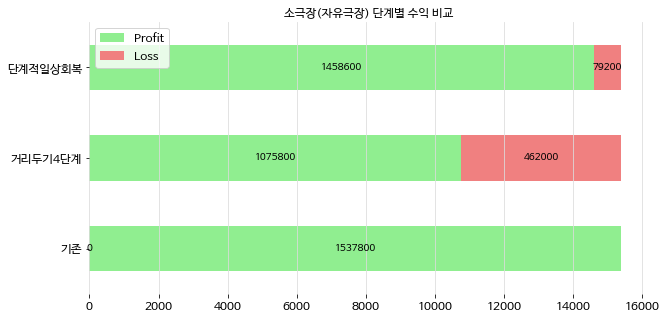

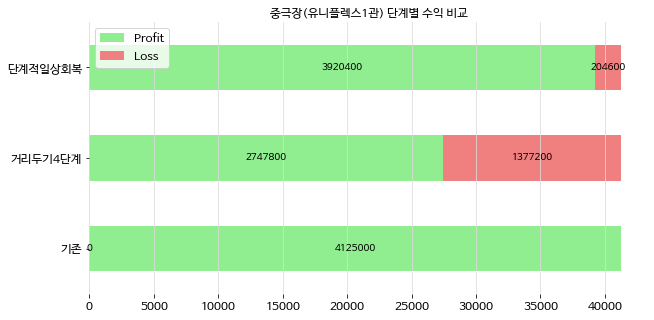

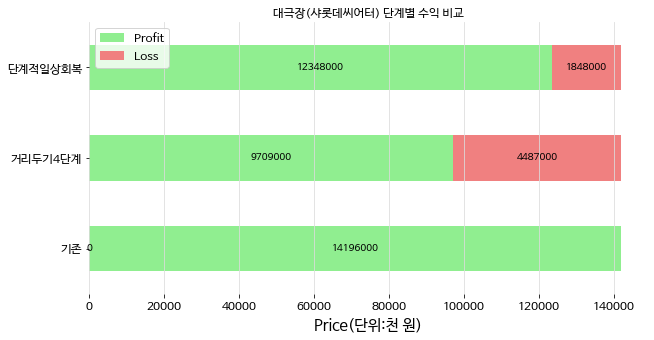

In [22]:
### 수익과 손해에 대해 비교하기 위해 stack 이용, 하나의 막대로 그래프 출력
## Profit 항목은 초록색으로, Loss 항목은 빨간색으로 표현.

#------------------------------------------------------------------------------

## 소극장(자유극장)
ax = sTheater_df.plot.barh(stacked=True, 
                      color={"Profit":"lightgreen", "Loss":"lightcoral"},
                      )
plt.title("소극장(자유극장) 단계별 수익 비교")
plt.grid(True, axis='x', color='gainsboro')

plt.rcParams["figure.figsize"] = (10, 5)

# 그래프에 대해 수익/손실값 표기
for p in ax.patches :
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)


#------------------------------------------------------------------------------
## 중극장(유니플렉스1관)
ax = mTheater_df.plot.barh(stacked=True, 
                      color={"Profit":"lightgreen", "Loss":"lightcoral"},
                      )
plt.title("중극장(유니플렉스1관) 단계별 수익 비교")
plt.grid(True, axis='x', color='gainsboro')

plt.rcParams["figure.figsize"] = (10, 5)

# 그래프에 대해 수익/손실값 표기
for p in ax.patches :
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)


#------------------------------------------------------------------------------
## 대극장(샤롯데씨어터)
ax = gTheater_df.plot.barh(stacked=True, 
                      color={"Profit":"lightgreen", "Loss":"lightcoral"},
                      )
plt.xlabel("Price(단위:천 원)")
plt.title("대극장(샤롯데씨어터) 단계별 수익 비교")
plt.grid(True, axis='x', color='gainsboro')
plt.legend(loc='upper left')

# 그래프에 대해 수익/손실값 표기
for p in ax.patches :
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)

plt.rcParams["figure.figsize"] = (10, 5)
plt.show()


>  **'단계별 수익 비교'에 대한 결과**
* 그래프에 나타난 **비율만을 고려**했을 때 :
 + '**단계적일상회복**'에서, 소극장과 중극장에 비해 **대극장의 피해가 더 크다**는 것을 알 수 있다.
 + '**거리두기4단계**'에서, 세 극장 사이에 **큰 차이가 없다**는 것을 알 수 있다.



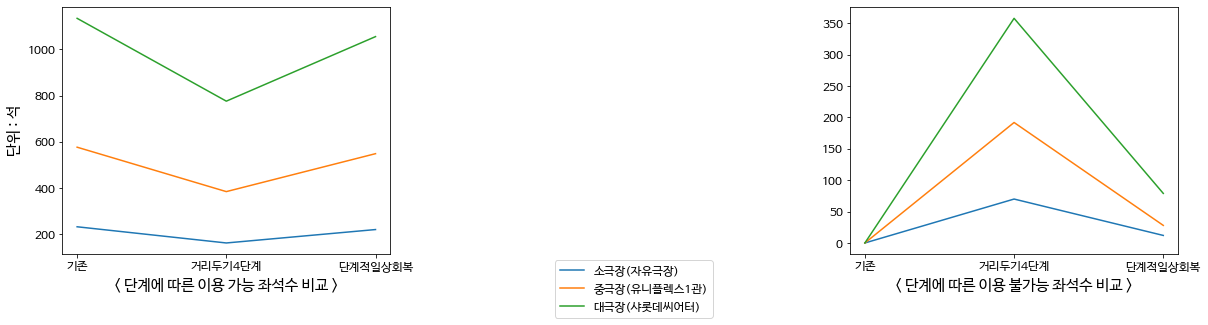

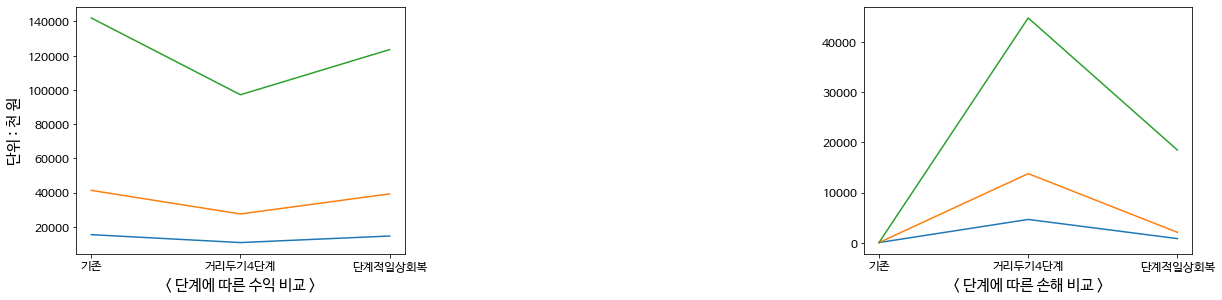

In [23]:
plt.figure(figsize=(20,10))

## 이용 가능한 좌석의 개수
plt.subplot(2,3,1)
plt.plot(step, sSeat_df['Available']) #소극장(자유극장)
plt.plot(step, mSeat_df['Available']) #중극장(유니플렉스1관)
plt.plot(step, gSeat_df['Available']) #대극장(샤롯데씨어터)
plt.xlabel('< 단계에 따른 이용 가능 좌석수 비교 >')
plt.ylabel('단위 : 석')


## 이용 불가능한 좌석의 개수
plt.subplot(2,3,3)
plt.plot(step, sSeat_df['UnAvailable']) #소극장(자유극장) 
plt.plot(step, mSeat_df['UnAvailable']) #중극장(유니플렉스1관)
plt.plot(step, gSeat_df['UnAvailable']) #대극장(샤롯데씨어터)
plt.xlabel('< 단계에 따른 이용 불가능 좌석수 비교 >')

# 범례 설정
plt.legend(theaterN,  bbox_to_anchor=(-0.4, 0.0))


### 거리두기 단계에 따른 손익 비교 그래프를 출력한다.
plt.figure(figsize=(20,10))

plt.subplot(2,3,4)
plt.plot(step, sTheater_df['Profit']) #소극장
plt.plot(step, mTheater_df['Profit']) #중극장
plt.plot(step, gTheater_df['Profit']) #대극장
plt.xlabel('< 단계에 따른 수익 비교 >')
plt.ylabel('단위 : 천 원')

plt.subplot(2,3,6)
plt.plot(step, sTheater_df['Loss']) #소극장
plt.plot(step, mTheater_df['Loss']) #중극장
plt.plot(step, gTheater_df['Loss']) #대극장
plt.xlabel('< 단계에 따른 손해 비교 >')

plt.show()


>  **라인플롯을 이용한 결과**
* 좌석수가 적어 상대적으로 변화가 미미해보이는 소극장과 달리, 중극장부터는 그래프의 꺾임이 확실하게 보이기 시작함을 알 수 있다.
* 이용 가능/불가능 **좌석 수에 따라** 수익/손해의 그래프가 **비슷한 모양**으로 그려짐을 알 수 있다.
* **'거리두기4단계'를 기준**으로 각 그래프를 살펴보면,
  + 코로나 이전의 시기에 비해 수익(Profit) 면에서 감소를, 손해(Loss) 면에서는 증가를 보여주고 있다.
  +'단계적일상회복'을 시행할 때 수익(Profit) 면에서 증가를, 손해(Loss) 면에서는 감소를 보여주고 있다.

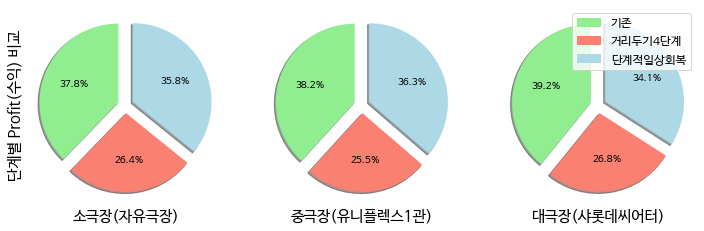

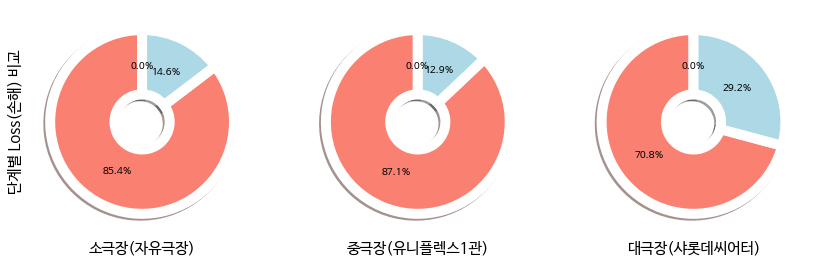

In [24]:
### pie plot으로 단계별 Profit(수익) 비교

## 기존 수익을 강조하기 위한 간격 확보
explode_value = (0.1,0.1,0.1)

## 색상 지정
colors = ['lightgreen', 'salmon', 'lightblue']

plt.figure(figsize=(12,12))

## 순서대로 소/중/대극장의 수익에 대한 플롯
plt.subplot(2,3,1)
plt.pie(sTheater_profit, autopct='%0.1f%%',
        startangle=90, explode=explode_value, shadow=True, colors=colors)
plt.xlabel(theaterN[0])
plt.ylabel("단계별 Profit(수익) 비교")

plt.subplot(2,3,2)
plt.pie(mTheater_profit, autopct='%0.1f%%',
        startangle=90, explode=explode_value, shadow=True, colors=colors)
plt.xlabel(theaterN[1])

plt.subplot(2,3,3)
plt.pie(gTheater_profit, autopct='%0.1f%%',
        startangle=90, explode=explode_value, shadow=True, colors=colors)
plt.xlabel(theaterN[2])

# 범례 출력
plt.legend(step, loc='upper right')

#-------------------------------------------------------------------------------

### pie plot으로 단계별 Loss(손해) 비교

## 부채꼴 영역의 스타일 지정
wedgeprops = {'width': 0.7, 'edgecolor':'w', 'linewidth':10}

plt.figure(figsize=(14,14))

## 순서대로 소/중/대극장의 수익에 대한 플롯
plt.subplot(2,3,4)
plt.pie(sTheater_loss, autopct='%0.1f%%',
        startangle=90, shadow=True, colors=colors, wedgeprops=wedgeprops)
plt.xlabel(theaterN[0])
plt.ylabel("단계별 Loss(손해) 비교")

plt.subplot(2,3,5)
plt.pie(mTheater_loss, autopct='%0.1f%%',
        startangle=90, shadow=True, colors=colors, wedgeprops=wedgeprops)
plt.xlabel(theaterN[1])

plt.subplot(2,3,6)
plt.pie(gTheater_loss, autopct='%0.1f%%',
        startangle=90, shadow=True, colors=colors, wedgeprops=wedgeprops)
plt.xlabel(theaterN[2])

plt.show()


**파이플롯에 대한 결과**
* **Profit** : '기존(코로나 이전)', '단계적일상회복', '거리두기4단계'를 비교한다.
> 1. 세 극장 모두 기존>일상회복>4단계 순으로 **수익이 줄어듦**을 알 수 있다.

* **Loss** : '단계적일상회복'과 '거리두기4단계'를 비교한다.
> 1. **소극장**의 경우 일상회복과 4단계는 각각 14.6%, 85.4%의 비율로, **약 6배** 차이가 난다.
> 2. **중극장**의 경우 일상회복과 4단계는 각각 12.9%, 87.1%의 비율로, **약 7배** 차이가 난다.
> 3. **대극장**의 경우 일상회복과 4단계는 각각 29.2%, 70.8%의 비율로, **약 2.5배** 차이가 난다.
> 4. 세 극장 모두 '단계적일상회복' 시기일 때 확연히 **손해가 줄었음**을 알 수 있다.



# **5. 후기**


> **어려웠던 점**
1. '자유 주제'라는 점에서 어떤 자료를 분석할지 고민을 많이 했다.
2. 데이터를 직접 모아서 정리, 분류하는 작업을 거쳐야 했는데, 이 과정이 상당히 번거롭고 시간을 잡아먹었다.
3. 다양한 방법들 중에서 더 효과적으로 비교할 수 있는 것을 찾는 게 고민이 많이 됐다.

> **아쉬운 점 / 보완하고 싶은 점**
1. 중계 데이터를 이용해 해보고 싶은 게 있었는데 주제와 맞지 않는 것 같아 제외한 것들이 있다.
2. 취소/재예매 부분에 '가변석' 취소에 대한 데이터를 넣지 못한 점이 아쉽다.
 + 취소회차를 계산해 이에 대한 비교도 진행하려 했는데, '가변석 취소'에 대한 정확한 자료수집이 오래 걸려서 회차 데이터는 포함하지 못했다.
3. 2019년의 다른 월들에 비해 7월과 9월의 상연횟수와 매출액이 적은 이유에 대해 조사해보고 싶다.
4. 어떻게 표현해야 더 효율적으로 비교를 할 수 있을지 고민을 많이 했지만, 잘 보여주지 못한 것 같아 아쉬운 점도 많다.


# **6. Reference**


> **외부 코드**
*   한글 폰트
>> https://wikidocs.net/45798
*   그래프 위 수치 표기
>>+ 2020, 2021 중계 횟수 표기 (2. 공연 중계)
>>+ 극장별 수익/손실값 표기 (3. 극장별 거리두기 수익/손해 비교)
>>+ https://pydole.tistory.com/entry/Python-matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84%EC%97%90-%EA%B0%92-%ED%91%9C%EC%8B%9C-%ED%95%98%EA%B8%B0
* import gsheet
>> https://www.youtube.com/watch?v=A40mIVUwr6k&ab_channel=PythonTricks

> **참고 자료**
* KOPIS(공연예술 통합전산망) : 결산통계 (2019.07~2021.12)
>> https://www.kopis.or.kr/por/main/main.do
* 코로나바이러스감염증-19(COVID-19) : 뉴스&이슈 (보도자료)
>> http://ncov.mohw.go.kr/tcmBoardList.do?brdId=3
* 네이버캘린더 중계일정 (2020.01~2021.12)
>> https://calendar.naver.com/publicCalendar.nhn?publishedKey=7e5526e39303f42b30b4ec86eb15dc38
* 컬처브릿지 중계일정 (2020.01~2021.12)
>> https://www.c-bridge.co.kr/calendars
* 공연 제작사들의 공식 sns에 게시된 공지사항(공연 중계, 취소, 재예매)

> **자료 정리한 구글 스프레드 시트**
* https://docs.google.com/spreadsheets/d/1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k/edit?usp=sharing